# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [ ]:
#we've looked a little bit at recursion

def merge_sort(array):
    
    if len(array) > 1: #base case 
        
        mid = len(array) // 2
        lefthalf = array[:mid]
        righthalf = array[mid:]
        
        
        merge_sort(lefthalf) #recursion
        merge_sort(right) #recursion
        
        #recursion is when we call upon the function inside the function 
        
        
#recursion will always a base case

In [7]:
# Write out a function to find the nth number in the fibonnaci sequence

def fibo(n):
    
    #set our base case right away
    if n <= 1:
        return n
    
    else:
        return fibo(n-1) + fibo(n-2) #Exponential time complexity O(2^n)
    
    
fibo(30)


832040

In [2]:
#Dealing with Time space and recursion


def dibo(n): #fibo's long lost brother
    
    #set our  base case right away
    print(n)
    if n <= 1:
        return  n
    else:
        return dibo(n-1) #linear time complexity 
    
    
dibo(5)   

5
4
3
2
1


1

Calculating the time space complexity of the Fibbonacci sequence


## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

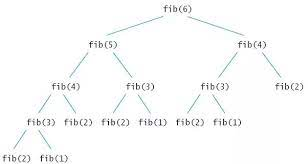

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [14]:
#The super power of Dictionaries

#using dictionaries to store our solutions so we don't have to keep solving the same problems over and over again

def fibo_memo(n, cache={}): #cacheing is $$$ put this on your resume! 
    
    #membership check inside of our dictionary. Constant time complexity aka the best time complexity 
    if n in cache:
        return cache[n]
    
    #if we don't find that solution in our dictionary, write our base case
    elif n <= 1:
        return n
    
    else:
        cache[n] = fibo_memo(n - 1) + fibo_memo(n - 2) #Linear Time Complexity Again 
        return cache[n]
    
    
fibo_memo(2000)

4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125

## Decorators

<p>A Decorator in Python is a function that takes another function that as an argument, and returns a 3rd function. Decorators are extremely useful as they allow the extenson of an existing function, without any of the original source code.</p>

In [19]:
#Decorator Syntax

#regular function
def shout(words):
    return words.upper()


#call this function
print(shout("Hey you over there!"))

#store a function call in memory
yell = shout #pointing to the same object

print(yell)
print(yell("What do you want?"))
print(shout("Nothing, sorry wrong person"))

HEY YOU OVER THERE!
<function shout at 0x7fae4d411ea0>
WHAT DO YOU WANT?
NOTHING, SORRY WRONG PERSON


In [22]:
#we can also pass functions into other functions as arguments

def whisper(words):
    return words.lower()


def say_something(function):
    return function("And I say hey, What's going on? ") #this is your rpg weapon


#I can pass any function into my say_something that takes in a string argument 
print(say_something(shout)) #passing in shout function into another function say_something()
print(say_something(whisper)) #whisper, shout, yell is the extension of that 
print(say_something(yell))

AND I SAY HEY, WHAT'S GOING ON? 
and i say hey, what's going on? 
AND I SAY HEY, WHAT'S GOING ON? 


In [26]:
#decorators do the opposite
#they pass in the original function into the extended function (aka decorator)

#so this is our OG function we want to extend the functionality of 
#weapon in rpg game 
def say_something():
#     print("In the OG function")
    return "And I say hey, What's going on?"


#decorator aka enchantment or making your weapon more dangerous 
def uppercase_decorator(function): #the outside function takes in the function as an argument
    
    #inside function is called a wrapper function 
    #the reason why we have wrapper functions (aka a function inside of a function) is because 
    #the outside function takes in the function to be decorated, the inside function will take in any 
    #arguments or keyword arguments 
    
    #keeps things seperated for error handling & reasubility 
    
    """
    UpperCase Decorator takes in a function which returns a string & will uppercase that return. 
    """
    
    print("In the outer function")
    
    def wrapper(): #this inner function isn't taking any *args or **kwargs
        
        print("In the inner function")
        
        func = function() #making a call to the function we passed in
        make_upper = func.upper() #transforming its return
        return make_upper #returning out of our inner function
    
        # return function().upper()
        
    return wrapper


        #decorator aka the extension     #function we want to extend the functionality of
return_func = uppercase_decorator(say_something)
# print(return_func)
print(return_func()) #same as doing wrapper()

In the outer function
In the inner function
In the OG function
AND I SAY HEY, WHAT'S GOING ON?


In [28]:
# @ symbol denotes a decorator 


@uppercase_decorator
def say_something():
    return "And I said hey, What's going on"


say_something()

In the outer function
In the inner function


"AND I SAID HEY, WHAT'S GOING ON"

In [30]:
# @uppercase_decorator
# def say_something_again(words):
#     return words 


# say_something_again("Idk whats going on with you?")

In the outer function


TypeError: uppercase_decorator.<locals>.wrapper() takes 0 positional arguments but 1 was given

In [31]:
#rewriting our uppercase_decorator to be a heck of a lot more flexible!

def uppercase_decorator(function):
    
    
    """
    UpperCase Decorator takes in a function which returns any # of arguments or keyword arguments
    & will uppercase that string return. 
    """
    
    def wrapper(*args, **kwargs):
        func = function(*args, **kwargs)
        make_upper = func.upper()
        return make_upper
    
    return wrapper
    

In [33]:
#we are going to use decorators so much in flask


@uppercase_decorator
def teletubbies(*args):
    teletubbies = ", ".join(args)
    return teletubbies


print(teletubbies("Tinky Winky", "Dipsy", "La La", "Po"))

TINKY WINKY, DIPSY, LA LA, PO


## TwoSum Problem

Given an array of integers, return the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [36]:
array = [6,5,3,1,9]
target = 10
expected_outcome = [1,9] #these can be in any order
#return the index locations in a list [3,4]


array_2 = [3,2,1,4,10]
target_2 = 6
expected_outcome = [2,4] #can be in any order 
#return the index locations in a list [1,3]



In [39]:
#mild, medium & spicy salsa

#mild  aka brute force aka naive solution

#double for loop == Quadratic Time Complexity O(n^2)
def two_sum_loop(array, target):
    
    for i in range(len(array)): #linear
        for j in range(i+1,len(array)): #linear 
            if array[i] + array[j] == target and i != j:
                return [array[i], array[j]]
            
    #no solution in list
    return -1
            
            
two_sum_loop(array, target)
    

[1, 9]

In [40]:
#medium salsa

# .sort() alters the original list or sorted() creates a new list  


def two_sum_sort(array, target):
    
    array.sort() #little bugger that is Linear Logarithmic O(n log n)
    
    #declare our pointers
    left = 0
    right  = len(array) - 1
    
    while left <= right:
        
        if array[left] + array[right] == target:
            return [array[left], array[right]]
        
        elif array[left] + array[right] > target:
            right -= 1
            
        else:
            left += 1
     
    #no solution in list
    return -1


two_sum_sort(array, target)
    

[1, 9]

In [ ]:
# pretty spicy but almost tooo spicy! ghost pepper

#def find_sum(arr,target):
#     y=0
#     z=0
#     dict = {}
#     keys = []
#     for x in array:
#         keys.append(y)
#         dict.update({keys[z]:x})
#         z+=1
#         y+=1
#     y=0
#     z=0
#     while True:
#         if dict[keys[y]] != dict[keys[z]] and dict[keys[y]] + dict[keys[z]] == target:
#             print(f'{dict[keys[y]]} + {dict[keys[z]]} = target' )
#             break
#         else:
#             z+=1
#         if z >= len(dict):
#             y+=1
#             z=0

In [43]:
#spicy salsa 

#lists are ordered (aka as we the user put them into the list)
#set the computer makes that order based on the hashed values 



#Linear Time Complexity O(n)
def two_sum_dict(array, target):
    #we getting our dicTTTT out right now
    #we can use dict's little brother the set()
    
    sum_set = set(array) #just changes our list into a set right away so we don't have to add in the loop
    
    for num in array: #im just looping through values
        
        match = target - num #were like looking backwards
        if match in sum_set: #constant time complexity membership
            return [num, match]
       
            
    return -1


two_sum_dict(array, target)

[1, 9]

In [ ]:
# In Python, the space complexity of an algorithm can be quadratic if the algorithm uses a nested loop and 
# creates a new data structure for each iteration of the outer loop, and the size of the new data structure is 
# proportional to the number of iterations of the inner loop. For example, a nested loop that creates a new list 
# for each iteration of the outer loop, and appends to the list for each iteration of the inner loop, would have a 
# space complexity of O(n^2), where n is the number of iterations of the outer loop."